In [105]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re, os
import pandas as pd
import seaborn as sns


import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [106]:
# Get lastly created folder in a directory
def get_last_folder(dir):
    list_of_subfolders = [f.path for f in os.scandir(dir) if f.is_dir()]
    latest_subfolder = max(list_of_subfolders, key=os.path.getmtime)
    return latest_subfolder

In [107]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = ydata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(ydata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )
    print((xdata[start_ind], ydata[start_ind]))
    print((xdata[end_ind], ydata[end_ind]))
    return line

In [108]:
dataset_path_dir = "../../build/DATASET_COMPLEX_SPAD/"
list_of_files = glob.glob(dataset_path_dir + "*.csv")
latest_file = max(list_of_files, key=os.path.getctime)
dataset_path = latest_file
print("Dataset path: ", dataset_path)
df = pd.read_csv(dataset_path, sep=",", header=0)

idx_BV = df.columns.get_loc("BreakdownVoltage")
idxBrP = idx_BV + 1
idxDW = idx_BV + 2
idxDoping = np.arange(1, idx_BV, 1)

df.dropna()
df.tail()

Dataset path:  ../../build/DATASET_COMPLEX_SPAD/dataset_complex_2023-03-13_14-31-44.csv


,TotalLength,Donor_0,Donor_1,Donor_2,Donor_3,Donor_4,Donor_5,Donor_6,Donor_7,Donor_8,...,Acceptors_93,Acceptors_94,Acceptors_95,Acceptors_96,Acceptors_97,Acceptors_98,Acceptors_99,BreakdownVoltage,BreakdownProbability,DepletionWidth
9988,8.0,1.545000e+17,1.545000e+17,1.545000e+17,1.545000e+17,1.545000e+17,1.545000e+17,1.545000e+17,1.545000e+17,1.545000e+17,...,3.214000e+18,3.247000e+18,3.281000e+18,3.315000e+18,3.350000e+18,3.385000e+18,3.420000e+18,30.712,0.696,0.961
9989,8.0,1.025000e+17,1.025000e+17,1.025000e+17,1.025000e+17,1.025000e+17,1.025000e+17,1.025000e+17,1.025000e+17,1.025000e+17,...,2.427000e+17,2.887000e+17,3.434000e+17,3.859000e+17,2.865000e+17,2.127000e+17,1.579000e+17,18.613,0.610,0.608
9990,8.0,2.394000e+19,2.394000e+19,2.394000e+19,2.394000e+19,2.394000e+19,2.394000e+19,2.394000e+19,2.394000e+19,2.394000e+19,...,9.599000e+16,7.340000e+16,5.613000e+16,4.292000e+16,3.282000e+16,2.500000e+16,1.808000e+16,5.817,0.663,0.080
9991,8.0,1.970000e+17,1.970000e+17,1.970000e+17,1.970000e+17,1.970000e+17,1.970000e+17,1.970000e+17,1.970000e+17,1.970000e+17,...,1.738000e+16,2.524000e+16,3.665000e+16,5.323000e+16,7.730000e+16,1.201000e+17,2.066000e+17,14.658,0.672,0.400
9992,8.0,1.687000e+18,1.687000e+18,1.687000e+18,1.687000e+18,1.687000e+18,1.687000e+18,1.687000e+18,1.687000e+18,1.687000e+18,...,7.096000e+17,6.915000e+17,6.738000e+17,6.566000e+17,6.398000e+17,6.234000e+17,6.075000e+17,34.668,0.723,1.073


/home/hellebor/my_utox/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


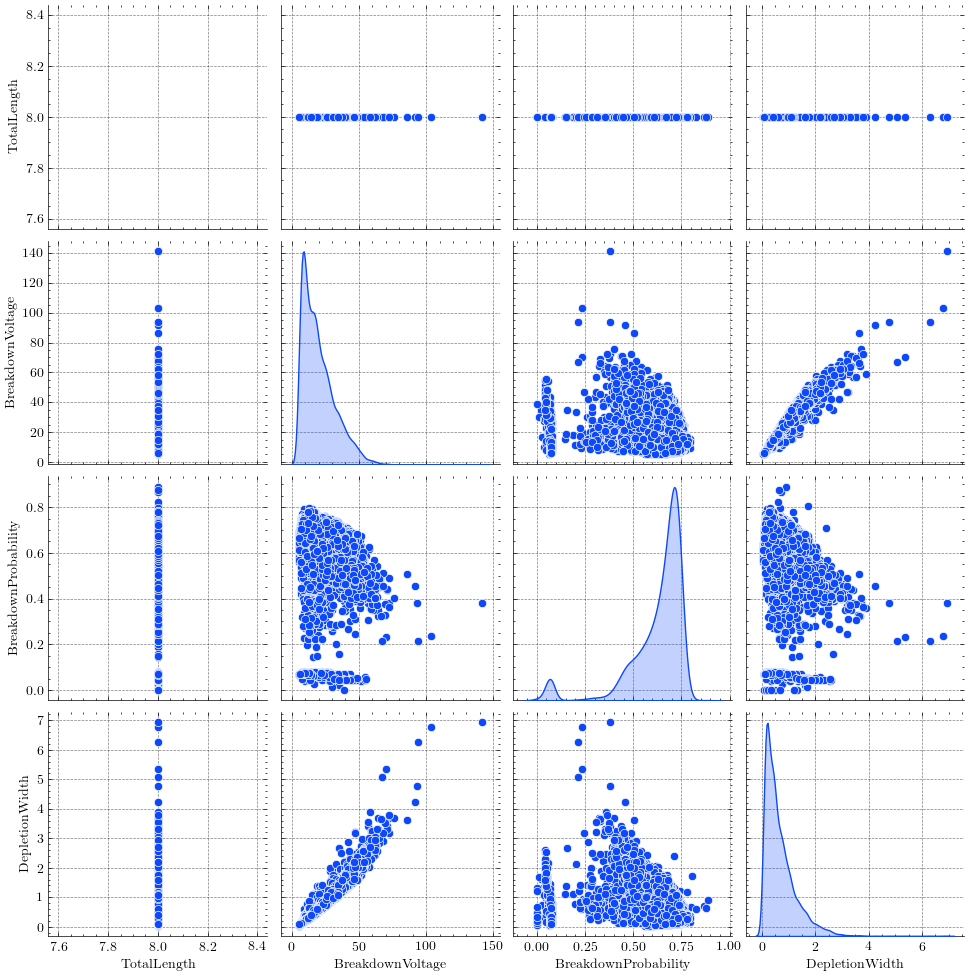

In [109]:
pp = sns.pairplot(df[["TotalLength", "BreakdownVoltage", "BreakdownProbability", "DepletionWidth"]], diag_kind="kde")
plt.show()

In [110]:
N = 10000
X = df["BreakdownVoltage"].to_numpy()[:N:]
Y = df["DepletionWidth"].to_numpy()[:N:]
Z = df["BreakdownProbability"].to_numpy()[:N:]

In [113]:
PSO_DIR = get_last_folder("../../build/results_pso/")
file_spad_figures_PSO = f"{PSO_DIR}/BEST/SPAD_figures_best_path.csv"

In [114]:
Iteration_PSO, BV_PSO, BrP_PSO, DW_PSO, Cost_PSO = np.loadtxt(file_spad_figures_PSO, delimiter=',', unpack=True, skiprows=1)
DW_PSO *= 1.0e6

# Sort by iteration
idx_PSO = np.argsort(Iteration_PSO)

Iteration_PSO = Iteration_PSO[idx_PSO]
BV_PSO = BV_PSO[idx_PSO]
BrP_PSO = BrP_PSO[idx_PSO]
DW_PSO = DW_PSO[idx_PSO]
Cost_PSO = Cost_PSO[idx_PSO]

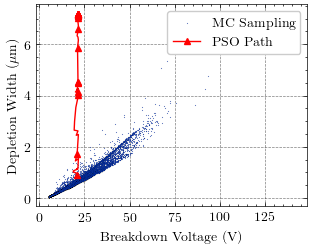

In [131]:
fig, axs = plt.subplots(1, 1)
axs.scatter(X, Y, s=2, marker='.', alpha=0.65, edgecolors='k', linewidths=0.1, label="MC Sampling")
axs.set_xlabel("Breakdown Voltage (V)")
axs.set_ylabel("Depletion Width ($\mu$m)")
line, = axs.plot(BV_PSO, DW_PSO, "-", c='r', marker='^', markevery=20, markersize=5, label="PSO Path")
iter = np.arange(0, len(BV_PSO), 1)
#axs.scatter(BV_PSO, DW_PSO, c=iter, s=10, alpha=0.75, edgecolor='k', linewidth=0.1)


axs.legend(loc='upper right')

fig.savefig("/home/hellebor/pathBest_BV_DW_PSOMC.pdf")
fig.savefig("/home/hellebor/pathBest_BV_DW_PSOMC.png", dpi=300)
plt.show()


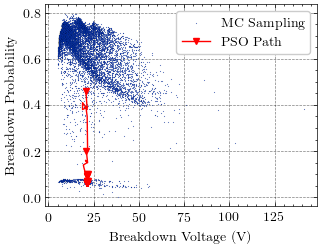

In [130]:
fig, axs = plt.subplots(1, 1)
axs.scatter(X, Z, s=2, marker='.', alpha=0.65, edgecolors='k', linewidths=0.1, label="MC Sampling")
axs.set_xlabel("Breakdown Voltage (V)")
axs.set_ylabel("Breakdown Probability")
axs.plot(BV_PSO, BrP_PSO, "-", c='r', marker='v', markevery=20, markersize=5, label="PSO Path")
iter = np.arange(0, len(BV_PSO), 1)
#axs.scatter(BV_PSO, BrP_PSO, c=iter, s=10, alpha=0.75, edgecolor='k', linewidth=0.1)
fig.savefig("/home/hellebor/pathBest_BV_BrP_PSOMC.pdf")
fig.savefig("/home/hellebor/pathBest_BV_BrP_PSOMC.png", dpi=300)
axs.legend()
plt.show()

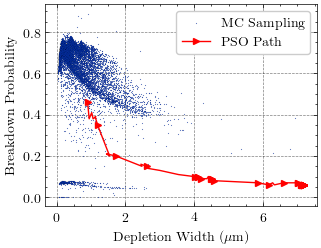

In [129]:
fig, axs = plt.subplots(1, 1)
axs.scatter(Y, Z, s=2, marker='.', alpha=0.65, edgecolors='k', linewidths=0.1, label="MC Sampling")
axs.set_xlabel("Depletion Width ($\mu$m)")
axs.set_ylabel("Breakdown Probability")
axs.plot(DW_PSO, BrP_PSO,"-", c='r', marker='>', markevery=10, markersize=5, label="PSO Path")
iter = np.arange(0, len(BV_PSO), 1)
#axs.scatter(DW_PSO, BrP_PSO, c=iter, s=10, alpha=0.75, edgecolor='k', linewidth=0.1)
axs.legend()
fig.savefig("/home/hellebor/pathBest_DW_BrP_PSOMC.pdf")
fig.savefig("/home/hellebor/pathBest_DW_BrP_PSOMC.png", dpi=300)
plt.show()

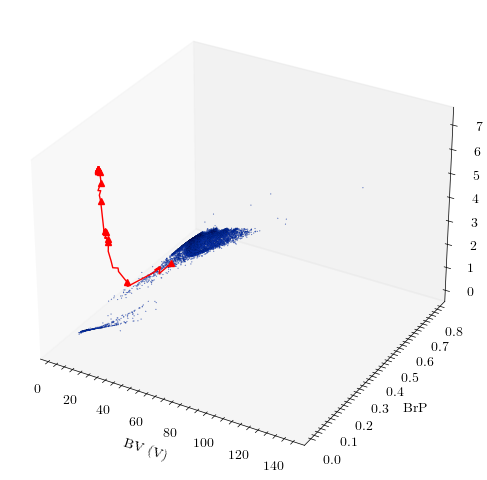

Frame 1439 / 1440.0

In [117]:
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("BV (V)")
ax.set_zlabel("DW ($\mu$m)")
ax.set_ylabel("BrP")
ax.grid(False)

ax.plot(BV_PSO, BrP_PSO, DW_PSO, c='r', marker='^', markevery=20, markersize=5, label="PSO Path")
scat = ax.scatter(X, Z, Y,  s=2, marker='.', alpha=0.65, edgecolors='k', linewidths=0.1)
fig.tight_layout()
plt.show()

def init():
    ax.view_init(elev=10., azim=0)
    return [scat]

k_param = 4.0

def animate(i):
    print(f"\rFrame {i} / {k_param*360}", end='', flush=True)
    angle = i / k_param
    ax.view_init(elev=10., azim=i)
    return [scat]

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(360*k_param), interval=20, blit=True)

# Save
anim.save('/home/hellebor/basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'], dpi=300)